In [3]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read in data, create dataframes
city_data_file = "/Users/scott/Bootcamp Lessons and Exercises/5.3 Real World Data Visualization with Matplotlib/Matplotlib HW/city_data.csv"
ride_data_file = "/Users/scott/Bootcamp Lessons and Exercises/5.3 Real World Data Visualization with Matplotlib/Matplotlib HW/ride_data.csv"

city_data_df = pd.read_csv(city_data_file)
ride_data_df = pd.read_csv(ride_data_file)

city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
#drop one duplicate record with same city name, same ride_ids but different # of drivers (Port James - this was sneaky)
city_data_df = city_data_df.drop_duplicates('city', keep='first')

city_ride_merged = city_data_df.merge(ride_data_df, on = "city")
city_ride_merged.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [7]:
#Group the merged df by city
data_merged_group_city = city_ride_merged.groupby("city")

#average fare
average_fare = data_merged_group_city.mean()["fare"]

#number of rides
num_ride = data_merged_group_city["ride_id"].count()

#number of drivers
driver_count = data_merged_group_city.mean()["driver_count"]

#data on city type
city_type = city_data_df.set_index('city')["type"]

#Create a dataframe with the variables
combined_city_info = pd.DataFrame({
    "Number of Rides": num_ride,
    "Average Fare": average_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

combined_city_info.sort_values("Number of Drivers", ascending=False).head()

,Average Fare,Number of Drivers,Number of Rides,Type of City
Davidtown,22.978095,73.0,21,Urban
South Bryanstad,24.598571,73.0,21,Urban
Williamshire,26.990323,70.0,31,Urban
West Sydneyhaven,22.368333,70.0,18,Urban
Torresshire,24.207308,70.0,26,Urban


In [8]:
#Creating the city type categories for colorization of the bubble chart

rural = combined_city_info[combined_city_info["Type of City"]=="Rural"]
Suburban = combined_city_info[combined_city_info["Type of City"]=="Suburban"]
Urban = combined_city_info[combined_city_info["Type of City"]=="Urban"]

In [9]:
#city type colors
color_scheme = {'lightskyblue':'#87CEFA', 'Gold':'#FFD700', 'lightcoral':'#F08080'}
city_colors = {"Rural":color_scheme["lightskyblue"], "Suburban":color_scheme["Gold"], "Urban":color_scheme["lightcoral"]}

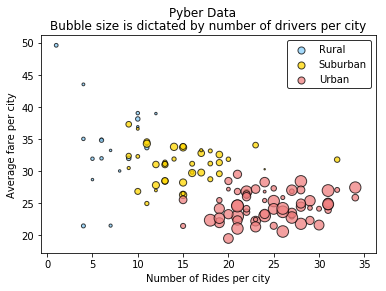

In [10]:
#Format Scatterplot
plt.scatter(rural["Number of Rides"], rural["Average Fare"], s = rural["Number of Drivers"]*2, color=city_colors["Rural"], edgecolor='black', label="Rural", alpha=.75)
plt.scatter(Suburban["Number of Rides"], Suburban["Average Fare"], s = Suburban["Number of Drivers"]*2, color=city_colors["Suburban"], edgecolor='black', label="Suburban", alpha=.75)
plt.scatter(Urban["Number of Rides"], Urban["Average Fare"], s = Urban["Number of Drivers"]*2, color=city_colors["Urban"], edgecolor='black', label="Urban", alpha=.75)

#formatting title and x an y labels
plt.suptitle('Pyber Data')
plt.title('Bubble size is dictated by number of drivers per city')
plt.xlabel('Number of Rides per city')
plt.ylabel('Average fare per city')

#create and format the legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.show()

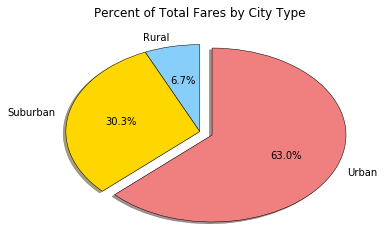

In [11]:
type_of_ride = city_ride_merged.groupby("type")["type", "fare", "ride_id", "driver_count"]

fare_sum = type_of_ride.sum()["fare"]
labels = fare_sum.index
colors = [city_colors[n] for n in labels]
explode = [0,0,.1]

plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("Percent of Total Fares by City Type")
plt.show()

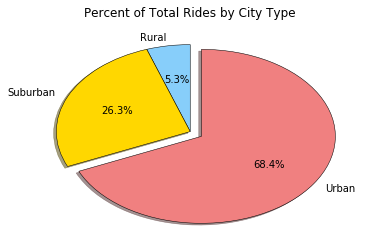

In [12]:
ride_sum = type_of_ride.count()["ride_id"]

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops = {"linewidth":.5, "edgecolor": "black"})
plt.title("Percent of Total Rides by City Type")
plt.show()

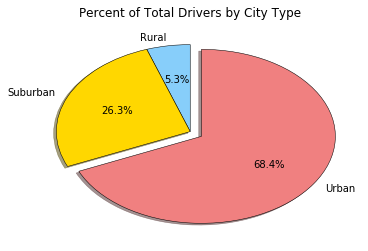

In [13]:
driver_sum = type_of_ride.count()["driver_count"]

labels=driver_sum.index
plt.pie(driver_sum, startangle = 90, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops = {"linewidth":.5, "edgecolor": "black"})
plt.title("Percent of Total Drivers by City Type")
plt.show()